In [30]:
import dai
import numpy as np
import pandas as pd

sd = '2024-05-01'
ed = '2024-06-13'

df = dai.query(f"""
SELECT date, instrument, trading_day, price
FROM cn_future_level1_snapshot
WHERE instrument='SR409.CZC'
AND date>='{sd} 00:00:00'
AND date<='{ed} 19:00:00'
""").df()
df.sort_values(['date'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [31]:
# 移动平均标准差
df['rolling_std'] = df['price'].rolling(window=1200).std()

# 计算向上的波动
def calc_upstd(series: pd.Series) -> float:
    mean = np.mean(series)
    upward_series = [x for x in series if x>mean]
    return np.sqrt(np.mean(((upward_series-mean)**2)))
# df['rolling_upward_std'] = df['price'].rolling(window=1200).apply(lambda x: calc_upstd(x))

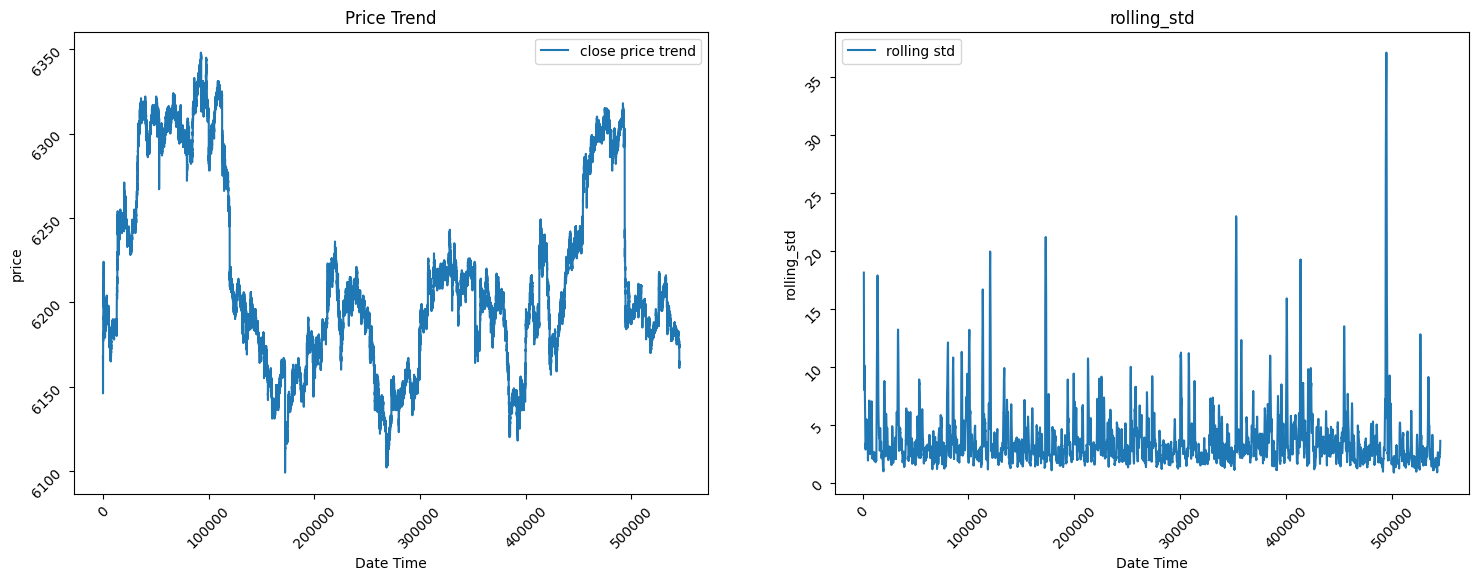

In [32]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].plot(df['price'], label='close price trend')
axs[0].set_title('Price Trend')
axs[0].set_xlabel('Date Time')
axs[0].set_ylabel('price')
axs[0].tick_params(rotation=45)
axs[0].legend()

axs[1].plot(df['rolling_std'], label='rolling std')
axs[1].set_title('rolling_std')
axs[1].set_xlabel('Date Time')
axs[1].set_ylabel('rolling_std')
axs[1].tick_params(rotation=45)
axs[1].legend()

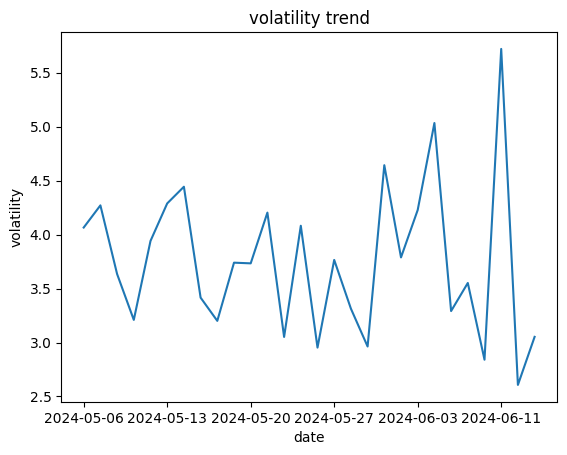

In [56]:
from datetime import datetime
series = df.groupby('trading_day')['rolling_std'].mean()
series.index = [datetime.strptime(str(i), '%Y%m%d').strftime('%Y-%m-%d') for i in series.index]
series.plot(kind='line')
plt.title('volatility trend')
plt.xlabel('date')
plt.ylabel('volatility')
plt.show()

In [61]:
a = {
    '2024-06-07': [13, 15420],
    '2024-06-11': [17, 8200],
    '2024-06-12': [8, 6120],
    '2024-06-13': [14, 16120],
    '2024-06-14': [13, 21460],
}
a = pd.DataFrame(a).T
a.columns=['交易次数','价差盈利']
a

,交易次数,价差盈利
2024-06-07,13,15420
2024-06-11,17,8200
2024-06-12,8,6120
2024-06-13,14,16120
2024-06-14,13,21460
